## Dataset
#### Allen Institute for Brain Science: Visual Coding - Neuropixels

© 2015 Allen Institute for Brain Science. Allen Brain Atlas API. Available from: https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels).

## ~

### Set-up

#### set paths

In [1]:
# set paths
PROJECT_PATH = "G:/Shared drives/visual_encoding" # shared results directory
MANIFEST_PATH = 'D:/datasets/allen_vc' # path to manifest file and local dataset

#### imports

In [2]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### settings

In [3]:
# choose example session of interest
SESSION_ID = 791319847

# choose stimulus of interest
STIM_CODE = 'natural_movie' # name of input/output folders (stimulus of interest)


In [4]:
# dataset details
FS = 1250 # LFP sampling freq

#### load data

In [5]:
# set up project cache
# cache = EcephysProjectCache.from_warehouse(manifest=f"{MANIFEST_PATH}/manifest.json")

In [6]:
# load example session data
# session = cache.get_session_data(SESSION_ID)

### Main

### ~

In [7]:
# load example block
fname_in = r"G:\Shared drives\visual_encoding\data\blocks\794812542_natural_movie.pkl"
block = pd.read_pickle(fname_in)
block


Block with 60 segments, 168 groups
annotations: {'session_type': 'functional_connectivity',
  'stimulus_name': 'natural_movie_one_more_repeats',
  'stimulus_frame': 0,
  'stimulus_code': 'movie',
  'time_window': [0, 30],
  'session_id': 794812542,
  'probe_id': 810758781,
  'stimulus_time': array([2290.83911817, 2320.86423817, 2350.88933817, 2380.91442817,
         2410.93953817, 2440.96457817, 2470.98972817, 2501.01481817,
         2531.03993817, 2561.06504817, 2591.09012817, 2621.11522817,
         2651.14033817, 2681.16541817, 2711.19051817, 2741.21560817,
         2771.24066817, 2801.26579817, 2831.29091817, 2861.31597817,
         2891.34108817, 2921.36619817, 2951.39130817, 2981.41637817,
         3011.44147817, 3041.46659817, 3071.49171817, 3101.51679817,
         3131.54187817, 3161.56698817, 7395.10546817, 7425.13055817,
         7455.15565817, 7485.18075817, 7515.20582817, 7545.23091817,
         7575.25604817, 7605.28114817, 7635.30624817, 7665.33132817,
         7695.35641

In [57]:
# check out running data
i_seg = 0
seg = block.segments[i_seg]
print(seg.annotations)
labels = []
for i_sig in range(len(seg.analogsignals)):
    print(seg.analogsignals[i_sig].annotations)
    try:
        labels.append(seg.analogsignals[i_sig].annotations['label'])
    except:
        labels.append('no label')
print(labels)

{}
{'label': 'lfp', 'ecephys_channel_id': array([849875498, 849875502, 849875508, 849875514, 849875520, 849875524,
       849875530, 849875536, 849875542, 849875548, 849875552, 849875558,
       849875564, 849875574, 849875580, 849875582, 849875588, 849875592,
       849875598, 849875604, 849875610, 849875614, 849875620, 849875626,
       849875632, 849875638, 849875642, 849875648, 849875654, 849875660,
       849875664, 849875670, 849875676, 849875682, 849875688, 849875496,
       849875500, 849875504, 849875506, 849875510, 849875512, 849875516,
       849875518, 849875522, 849875526, 849875528, 849875532, 849875534,
       849875538, 849875540, 849875544, 849875546, 849875550, 849875554,
       849875556, 849875560, 849875562, 849875566, 849875568, 849875572,
       849875576, 849875578, 849875584, 849875586, 849875590, 849875594,
       849875596, 849875600, 849875602, 849875606, 849875608, 849875612,
       849875616, 849875618, 849875622, 849875624, 849875628, 849875630,
       84

dict_keys(['_dimensionality', '_t_start', '_sampling_rate', 'annotations', 'array_annotations', 'name', 'file_origin', 'description', 'segment'])
(37500,) (37500, 1)


Text(0.5, 1.0, '')

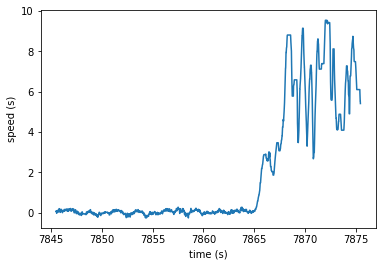

In [56]:
# check out running data
i_seg = 45
data = block.segments[i_seg].analogsignals[1]
print(data.__dict__.keys())
speed = data.magnitude
time = data.times
print(time.shape, speed.shape)

# plot running data
fig, ax = plt.subplots()
ax.plot(time, speed)
ax.set(xlabel="time (s)", ylabel=f"speed (s)")
ax.set_title("")


In [58]:
# analyze running

# loop through segments
running = np.zeros(len(block.segments))
for i_seg in range(len(block.segments)):
    # get running speed for segment
    data = block.segments[i_seg].analogsignals[1]
    speed = data.magnitude

    # determine if running
    running[i_seg] = np.any(speed>1)

    # save to block
    block.segments[i_seg].annotations['running'] = running[i_seg].astype(bool)

# save to block
block.annotations['running'] = running.astype(bool)


Running segments: 8
Stationary segments: 52


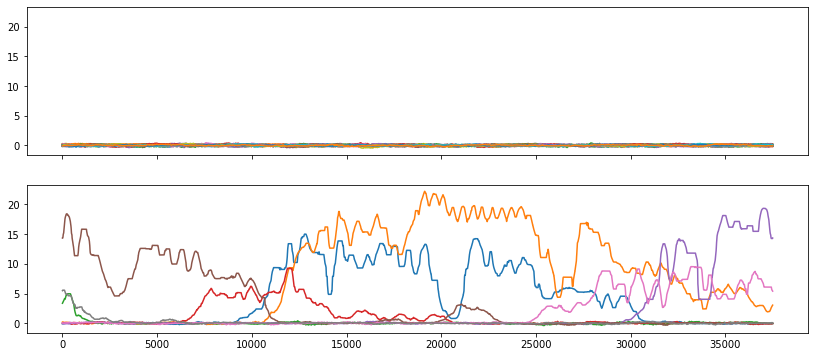

In [70]:
# plot speed for each running and stationary segment on seperate subplots
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(14,6))
for i_seg in range(len(block.segments)):
    # get running speed for segment
    data = block.segments[i_seg].analogsignals[1]
    speed = data.magnitude

    # plot speed
    ax[int(block.segments[i_seg].annotations['running'])].plot(speed)

# print number of running and stationary segments
print(f"Running segments: {int(np.sum(running))}")
print(f"Stationary segments: {int(len(running)-np.sum(running))}")
